In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [4]:
# Loading dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_val, y_val = X_train[50000:,:], y_train[50000:]
X_train, y_train = X_train[:50000, :], y_train[:50000]

In [5]:
X_train.shape

(50000, 28, 28)

Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N 28 28 * 1 để giống kích thước mà keras yêu cầu.

In [7]:
# Reshaping data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
# One hot coding label y
Y_train = keras.utils.to_categorical(y_train, 10)
Y_val = keras.utils.to_categorical(y_val, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

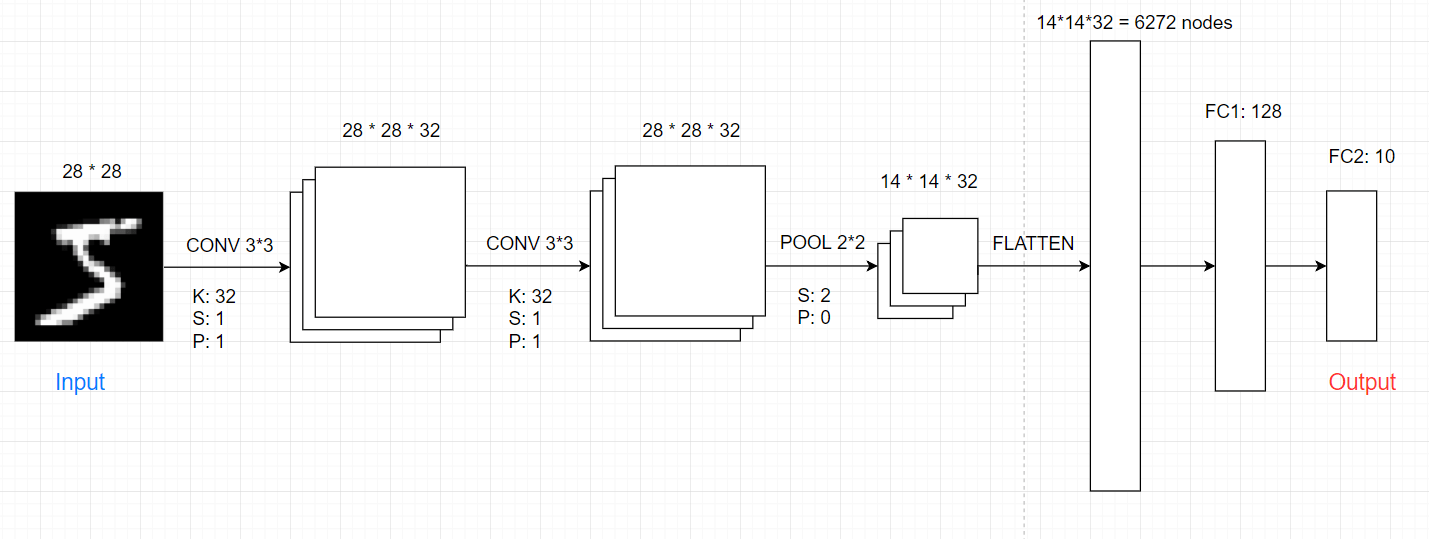

In [14]:
# Building model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'sigmoid', input_shape = (28, 28, 1)),
    keras.layers.Conv2D(32, (3,3), activation = 'sigmoid'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [17]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size = 32, epochs = 10, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 383us/sample - loss: 0.3749 - acc: 0.8844 - val_loss: 0.0892 - val_acc: 0.9764
Epoch 2/10
50000/50000 [==============================] - 16s 322us/sample - loss: 0.0836 - acc: 0.9743 - val_loss: 0.0655 - val_acc: 0.9822
Epoch 3/10
50000/50000 [==============================] - 16s 326us/sample - loss: 0.0548 - acc: 0.9830 - val_loss: 0.0645 - val_acc: 0.9834
Epoch 4/10
50000/50000 [==============================] - 14s 273us/sample - loss: 0.0426 - acc: 0.9866 - val_loss: 0.0566 - val_acc: 0.9823
Epoch 5/10
50000/50000 [==============================] - 15s 309us/sample - loss: 0.0343 - acc: 0.9891 - val_loss: 0.0532 - val_acc: 0.9847
Epoch 6/10
50000/50000 [==============================] - 16s 324us/sample - loss: 0.0269 - acc: 0.9919 - val_loss: 0.0476 - val_acc: 0.9874
Epoch 7/10
50000/50000 [==============================] - 17s 333us/sample - loss: 0.0213 - acc: 0.9929 

In [23]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy: %.2f%%' %(score[1]*100))

Accuracy: 98.49%


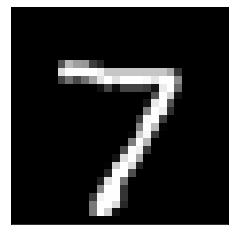

Label value: 7
Predicted value: 7


In [28]:
# Predicting
y_predict = model.predict(X_test[0].reshape(1, 28, 28, 1))
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()
print('Label value: ' + str(y_test[0]))
print('Predicted value: ' + str(np.argmax(y_predict)))